# Unsupervised Image Segmentation using Clustering!

## Load Data

In [36]:
import warnings
warnings.filterwarnings("ignore")

In [37]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 48.6MB/s]


In [38]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


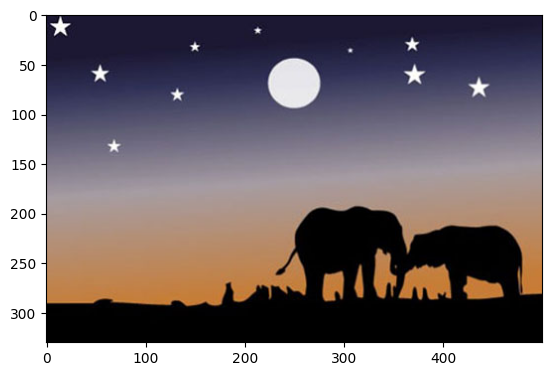

In [39]:
plt.imshow(im) # as RGB Format
plt.show()

In [40]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


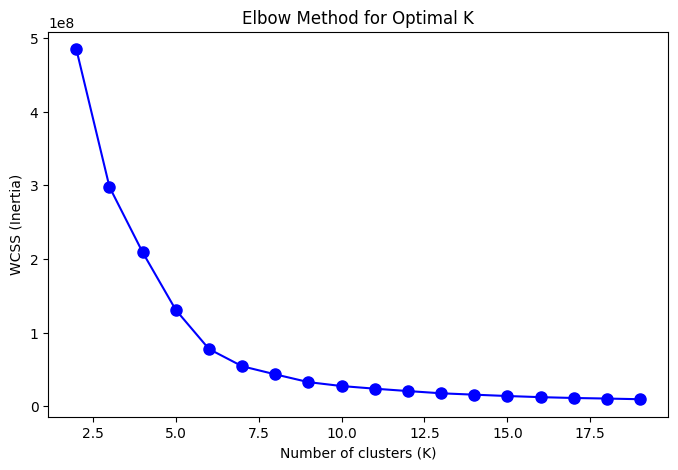

In [46]:
from sklearn.metrics import silhouette_score

# Range of K values to try
k_values = range(2, 20)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(all_pixels)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()

## Number of Dominant Colors in Image

## Visualize Dominant Color

In [77]:
K = 6
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(all_pixels)
dominant_colors = kmeans.cluster_centers_.astype(int)

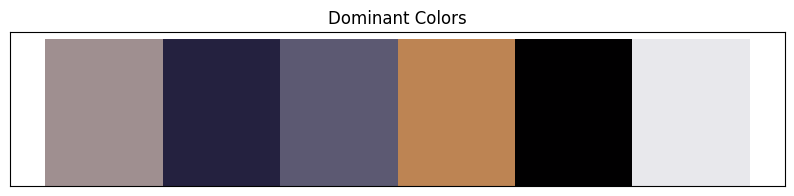

In [78]:
# Plot the each of dominant color as image
plt.figure(figsize=(10, 2))
plt.title('Dominant Colors')
plt.bar(range(K), [1]*K, color=[dominant_colors[i]/255 for i in range(K)], width=1)
plt.xticks([])
plt.yticks([])
plt.show()

## Segmenting original image

In [79]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


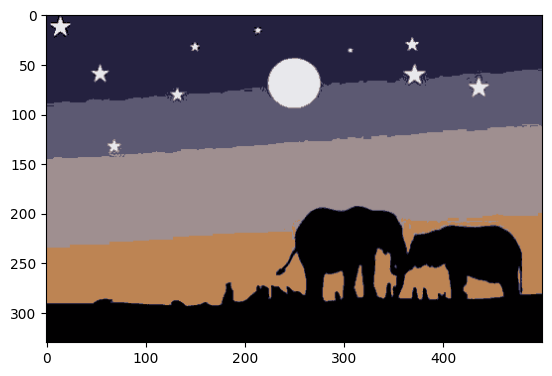

In [80]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()